# Problem statement - 1
Decision Tree
 
Assignment


About the data: 
    
Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 
    
 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
Problem Statement:
    
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [2]:
#Loading datasets
data1=pd.read_csv('Company_Data.csv')

In [3]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
data1.Sales.value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
data1.duplicated().sum()

0

# Converting sales data into 3 categories Low, High, Medium by binning sales columns

In [13]:
bins = np.linspace(min(data1['Sales']), max(data1['Sales']), 4)
bins

array([ 0.        ,  5.42333333, 10.84666667, 16.27      ])

In [14]:
label_names = ['Low', 'Medium', 'High']

In [15]:
data1['Sales_bin'] = pd.cut(data1['Sales'], bins, labels=label_names, include_lowest=True )
data1[['Sales','Sales_bin']].head(10)

,Sales,Sales_bin
0,9.50,Medium
1,11.22,High
2,10.06,Medium
3,7.40,Medium
4,4.15,Low
5,10.81,Medium
6,6.63,Medium
7,11.85,High
8,6.54,Medium
9,4.69,Low


In [16]:
data1 = data1.drop(("Sales"),axis=1)

In [17]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


# Doing label encoding for categorical columns

In [18]:
label_encoder = preprocessing.LabelEncoder()

In [19]:
data1['ShelveLoc']= label_encoder.fit_transform(data1['ShelveLoc']) 
data1['Urban']= label_encoder.fit_transform(data1['Urban'])
data1['US']= label_encoder.fit_transform(data1['US']) 

In [20]:
data1['Sales_bin']=label_encoder.fit_transform(data1['Sales_bin'])

In [21]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


In [22]:
data1.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [23]:
data1.Urban.value_counts()

1    282
0    118
Name: Urban, dtype: int64

In [24]:
data1.US.value_counts()

1    258
0    142
Name: US, dtype: int64

In [25]:
data1.Sales_bin.value_counts()

2    247
1    102
0     51
Name: Sales_bin, dtype: int64

In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int32
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int32
 9   US           400 non-null    int32
 10  Sales_bin    400 non-null    int32
dtypes: int32(4), int64(7)
memory usage: 28.2 KB


# Splitting data in x and y variable

In [27]:
x=data1.iloc[:,0:-1]
y=data1.iloc[:,-1]

In [28]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [29]:
y

0      2
1      0
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Sales_bin, Length: 400, dtype: int32

# Splitting data in train test data

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [33]:
print(x_train,' ',y_train)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
303        133      52           16         290     99          2   43   
349        134      27           18         467     96          2   49   
149        121     120           13         140     87          2   56   
100        113      69           11          94    106          2   76   
175        115      89            0          38    122          2   25   
..         ...     ...          ...         ...    ...        ...  ...   
369        135     100           22         463    122          2   36   
320        136      70           12         171    152          2   44   
15         149      95            5         400    144          2   76   
125         89      78            0         181     49          2   43   
265        130      35           10         402    129          0   39   

     Education  Urban  US  
303         11      1   1  
349         14      0   1  
149         11      1   1  

### Building Decision Tree Classifier using gini Criteria

In [34]:
model1 = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

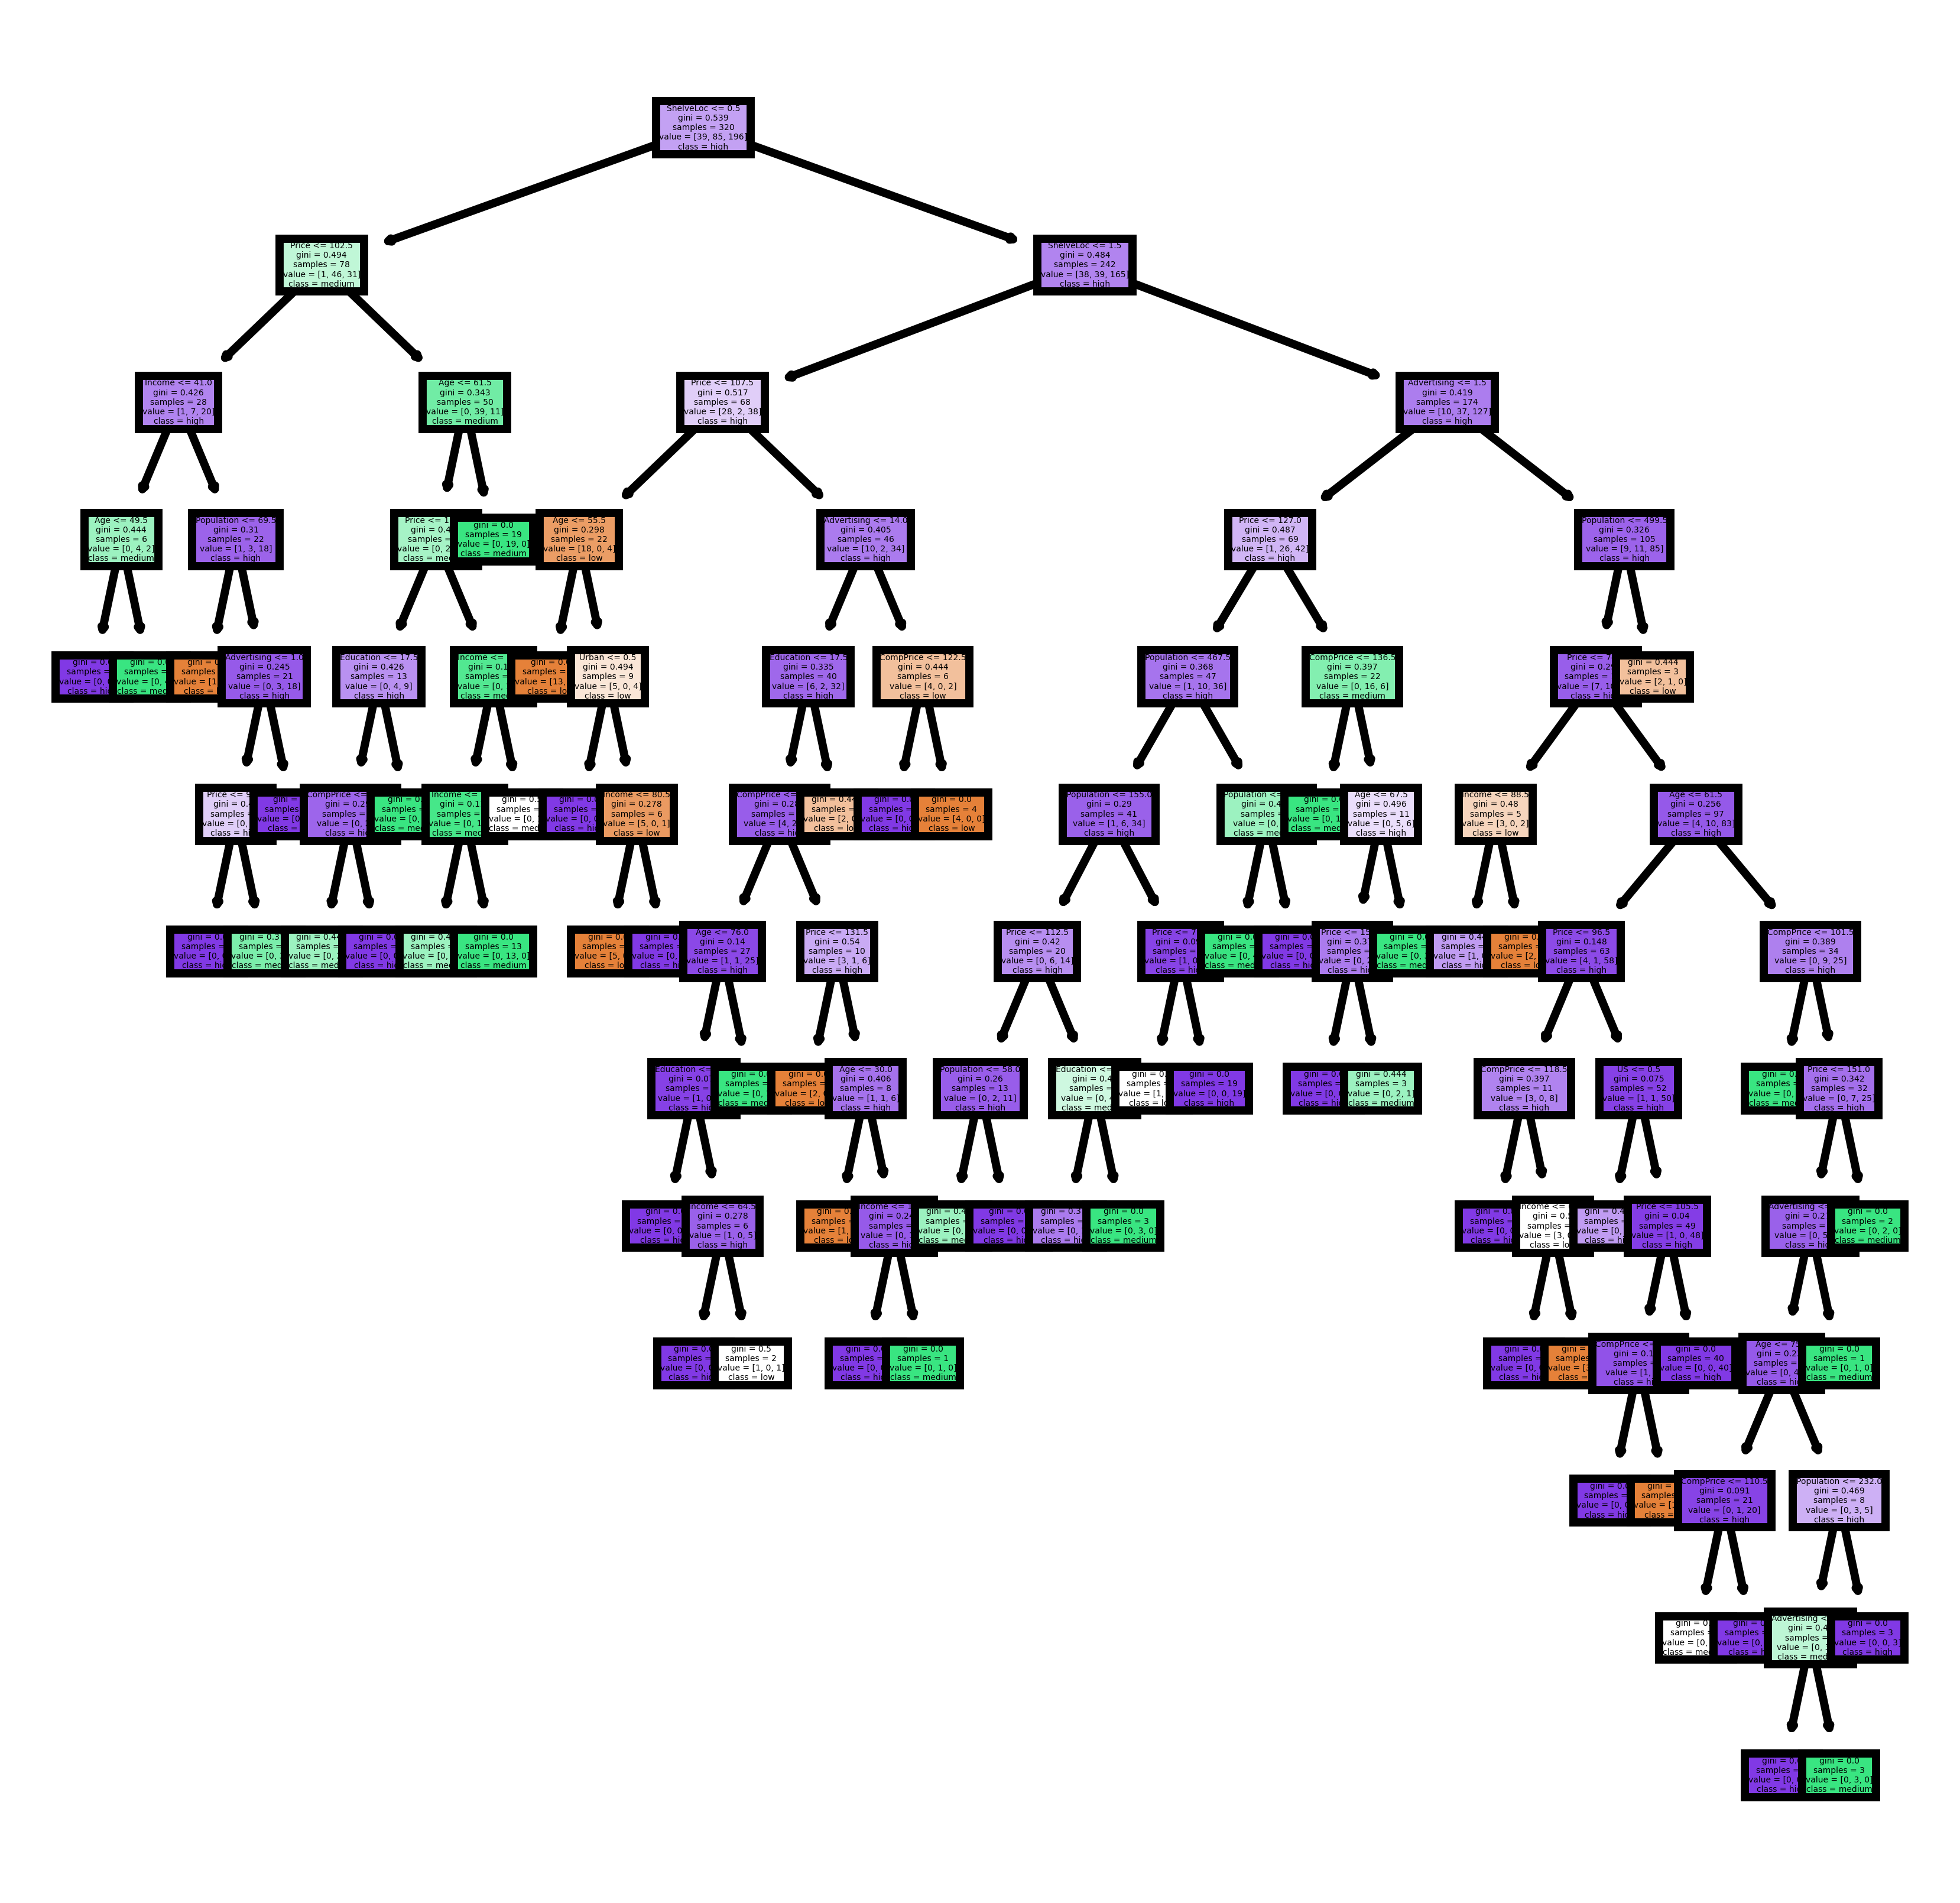

In [36]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['low', 'medium', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [38]:
#Predicting on test data
preds = model1.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    56
1    18
0     6
dtype: int64

In [39]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.6375

In [40]:
from sklearn.metrics import classification_report
classification_report(y_test,preds)

'              precision    recall  f1-score   support\n\n           0       0.67      0.33      0.44        12\n           1       0.39      0.41      0.40        17\n           2       0.71      0.78      0.75        51\n\n    accuracy                           0.64        80\n   macro avg       0.59      0.51      0.53        80\nweighted avg       0.64      0.64      0.63        80\n'

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,preds)

array([[ 4,  1,  7],
       [ 1,  7,  9],
       [ 1, 10, 40]], dtype=int64)

### Building Decision Tree Classifier (CART) using entropyCriteria

In [42]:
model2 = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

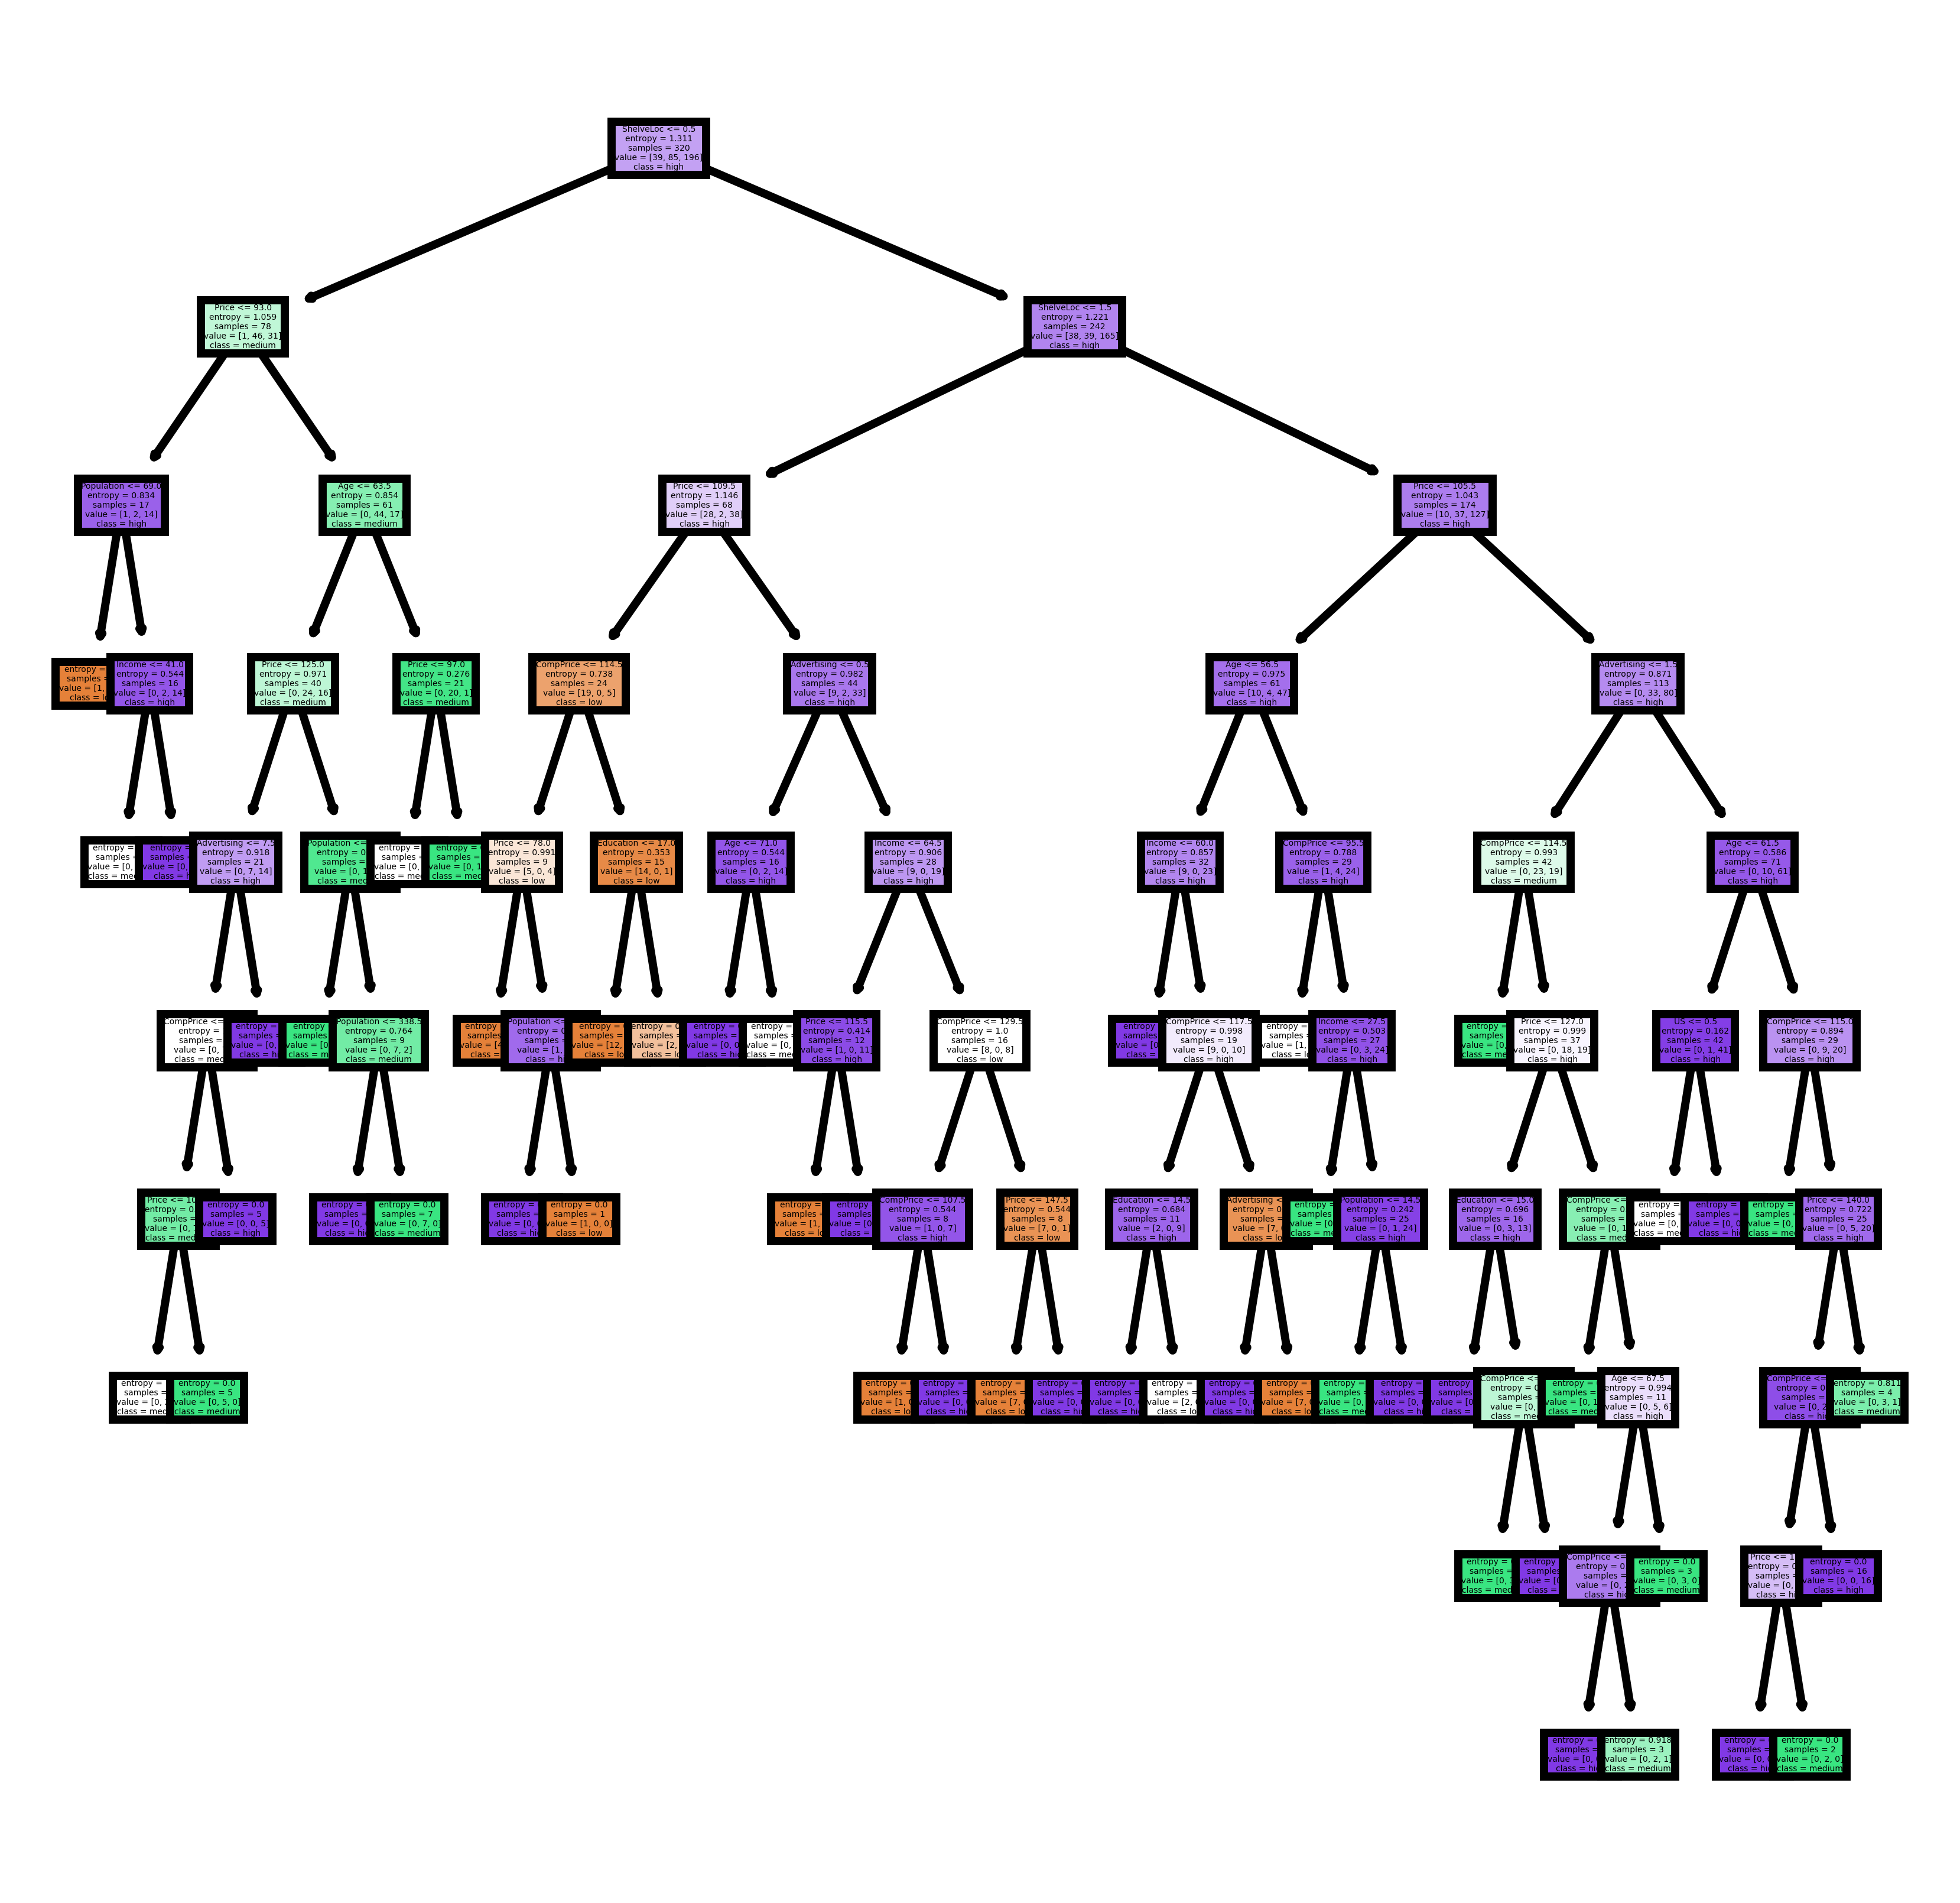

In [43]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['low', 'medium', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [45]:
#Predicting on test data
preds = model2.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    48
1    24
0     8
dtype: int64

In [46]:
metrics.accuracy_score(preds,y_test)

0.6625

In [48]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40        12
           1       0.54      0.76      0.63        17
           2       0.75      0.71      0.73        51

    accuracy                           0.66        80
   macro avg       0.60      0.60      0.59        80
weighted avg       0.67      0.66      0.66        80



In [50]:
print(confusion_matrix(y_test,preds))

[[ 4  0  8]
 [ 0 13  4]
 [ 4 11 36]]


### By seeing both model we are getting that the accuracy score of both model is very low to improve our accuracy score we have to find best hyper parameters for that we are using now gridsearchcv algorithm to get best hyper parameter 

In [51]:
model3=DecisionTreeClassifier()

In [52]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid={'criterion':['gini','entropy'],
            'min_samples_split':[5,10,15,20,25,30,35,40]}

In [103]:
grid_dt=GridSearchCV(model3,param_grid,scoring='accuracy',refit = True,cv=6)

In [104]:
grid_dt.fit(x_train, y_train) 


GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [5, 10, 15, 20, 25, 30, 35, 40]},
             scoring='accuracy')

In [105]:
print(grid_dt.best_params_)

{'criterion': 'entropy', 'min_samples_split': 35}


In [106]:
grid_pred = grid_dt.predict(x_test) 

In [107]:
metrics.accuracy_score(grid_pred,y_test)

0.675

In [108]:
print(classification_report(y_test, grid_pred)) 

              precision    recall  f1-score   support

           0       0.75      0.25      0.38        12
           1       0.54      0.41      0.47        17
           2       0.70      0.86      0.77        51

    accuracy                           0.68        80
   macro avg       0.66      0.51      0.54        80
weighted avg       0.67      0.68      0.65        80



In [109]:
print(confusion_matrix(y_test,grid_pred))

[[ 3  0  9]
 [ 0  7 10]
 [ 1  6 44]]


# Problem Statement - 2

Use decision trees to prepare a model on fraud data 

treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [110]:
#loading Dataset
data2 = pd.read_csv("Fraud_check.csv")

In [111]:
data2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [113]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [114]:
data2.duplicated().sum()

0

In [112]:
data2['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [115]:
#Creating a new column called Fraud_Check 
group_names = ['Risky', 'Not Risky']
data2['Fraud_Check']=pd.cut(data2['Taxable.Income'], bins = [0,30000,1000000], labels = group_names)


In [116]:
data2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,NO,Single,68833,50047,10,YES,Not Risky
1,YES,Divorced,33700,134075,18,YES,Not Risky
2,NO,Married,36925,160205,30,YES,Not Risky
3,YES,Single,50190,193264,15,YES,Not Risky
4,NO,Married,81002,27533,28,NO,Not Risky


In [118]:
data2['Fraud_Check'].value_counts()

Not Risky    476
Risky        124
Name: Fraud_Check, dtype: int64

In [122]:
data2['Undergrad']= label_encoder.fit_transform(data2['Undergrad']) 
data2['Marital.Status']= label_encoder.fit_transform(data2['Marital.Status'])
data2['Urban']= label_encoder.fit_transform(data2['Urban']) 
data2['Fraud_Check']=label_encoder.fit_transform(data2['Fraud_Check'])

In [123]:
data2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [124]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
 6   Fraud_Check      600 non-null    int32
dtypes: int32(2), int64(5)
memory usage: 28.2 KB


In [126]:
data2['Undergrad'].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [127]:
data2['Marital.Status'].value_counts()

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [128]:
data2['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [129]:
data2['Fraud_Check'].value_counts()

0    476
1    124
Name: Fraud_Check, dtype: int64

# Splitting data in x and y variable

In [130]:
x=data2.iloc[:,0:-1]
y=data2.iloc[:,-1]

In [131]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [132]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Fraud_Check, Length: 600, dtype: int32

# Splitting data in train test data

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [134]:
print(x_train,' ',y_train)

     Undergrad  Marital.Status  Taxable.Income  City.Population  \
284          0               0           15673           188383   
423          0               1           94528            80249   
525          1               2           47565            75307   
519          1               2           60915           162102   
12           0               0           11794           148033   
..         ...             ...             ...              ...   
369          0               1           94413            89122   
320          1               2           78922            78897   
527          0               1           59243           180274   
125          1               0           87326           155669   
265          0               1           14326           101996   

     Work.Experience  Urban  
284               22      1  
423               19      1  
525               23      0  
519               25      1  
12                14      1  
..             

### Building Decision Tree Classifier using gini Criteria

In [135]:
mod1 = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)
mod1.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

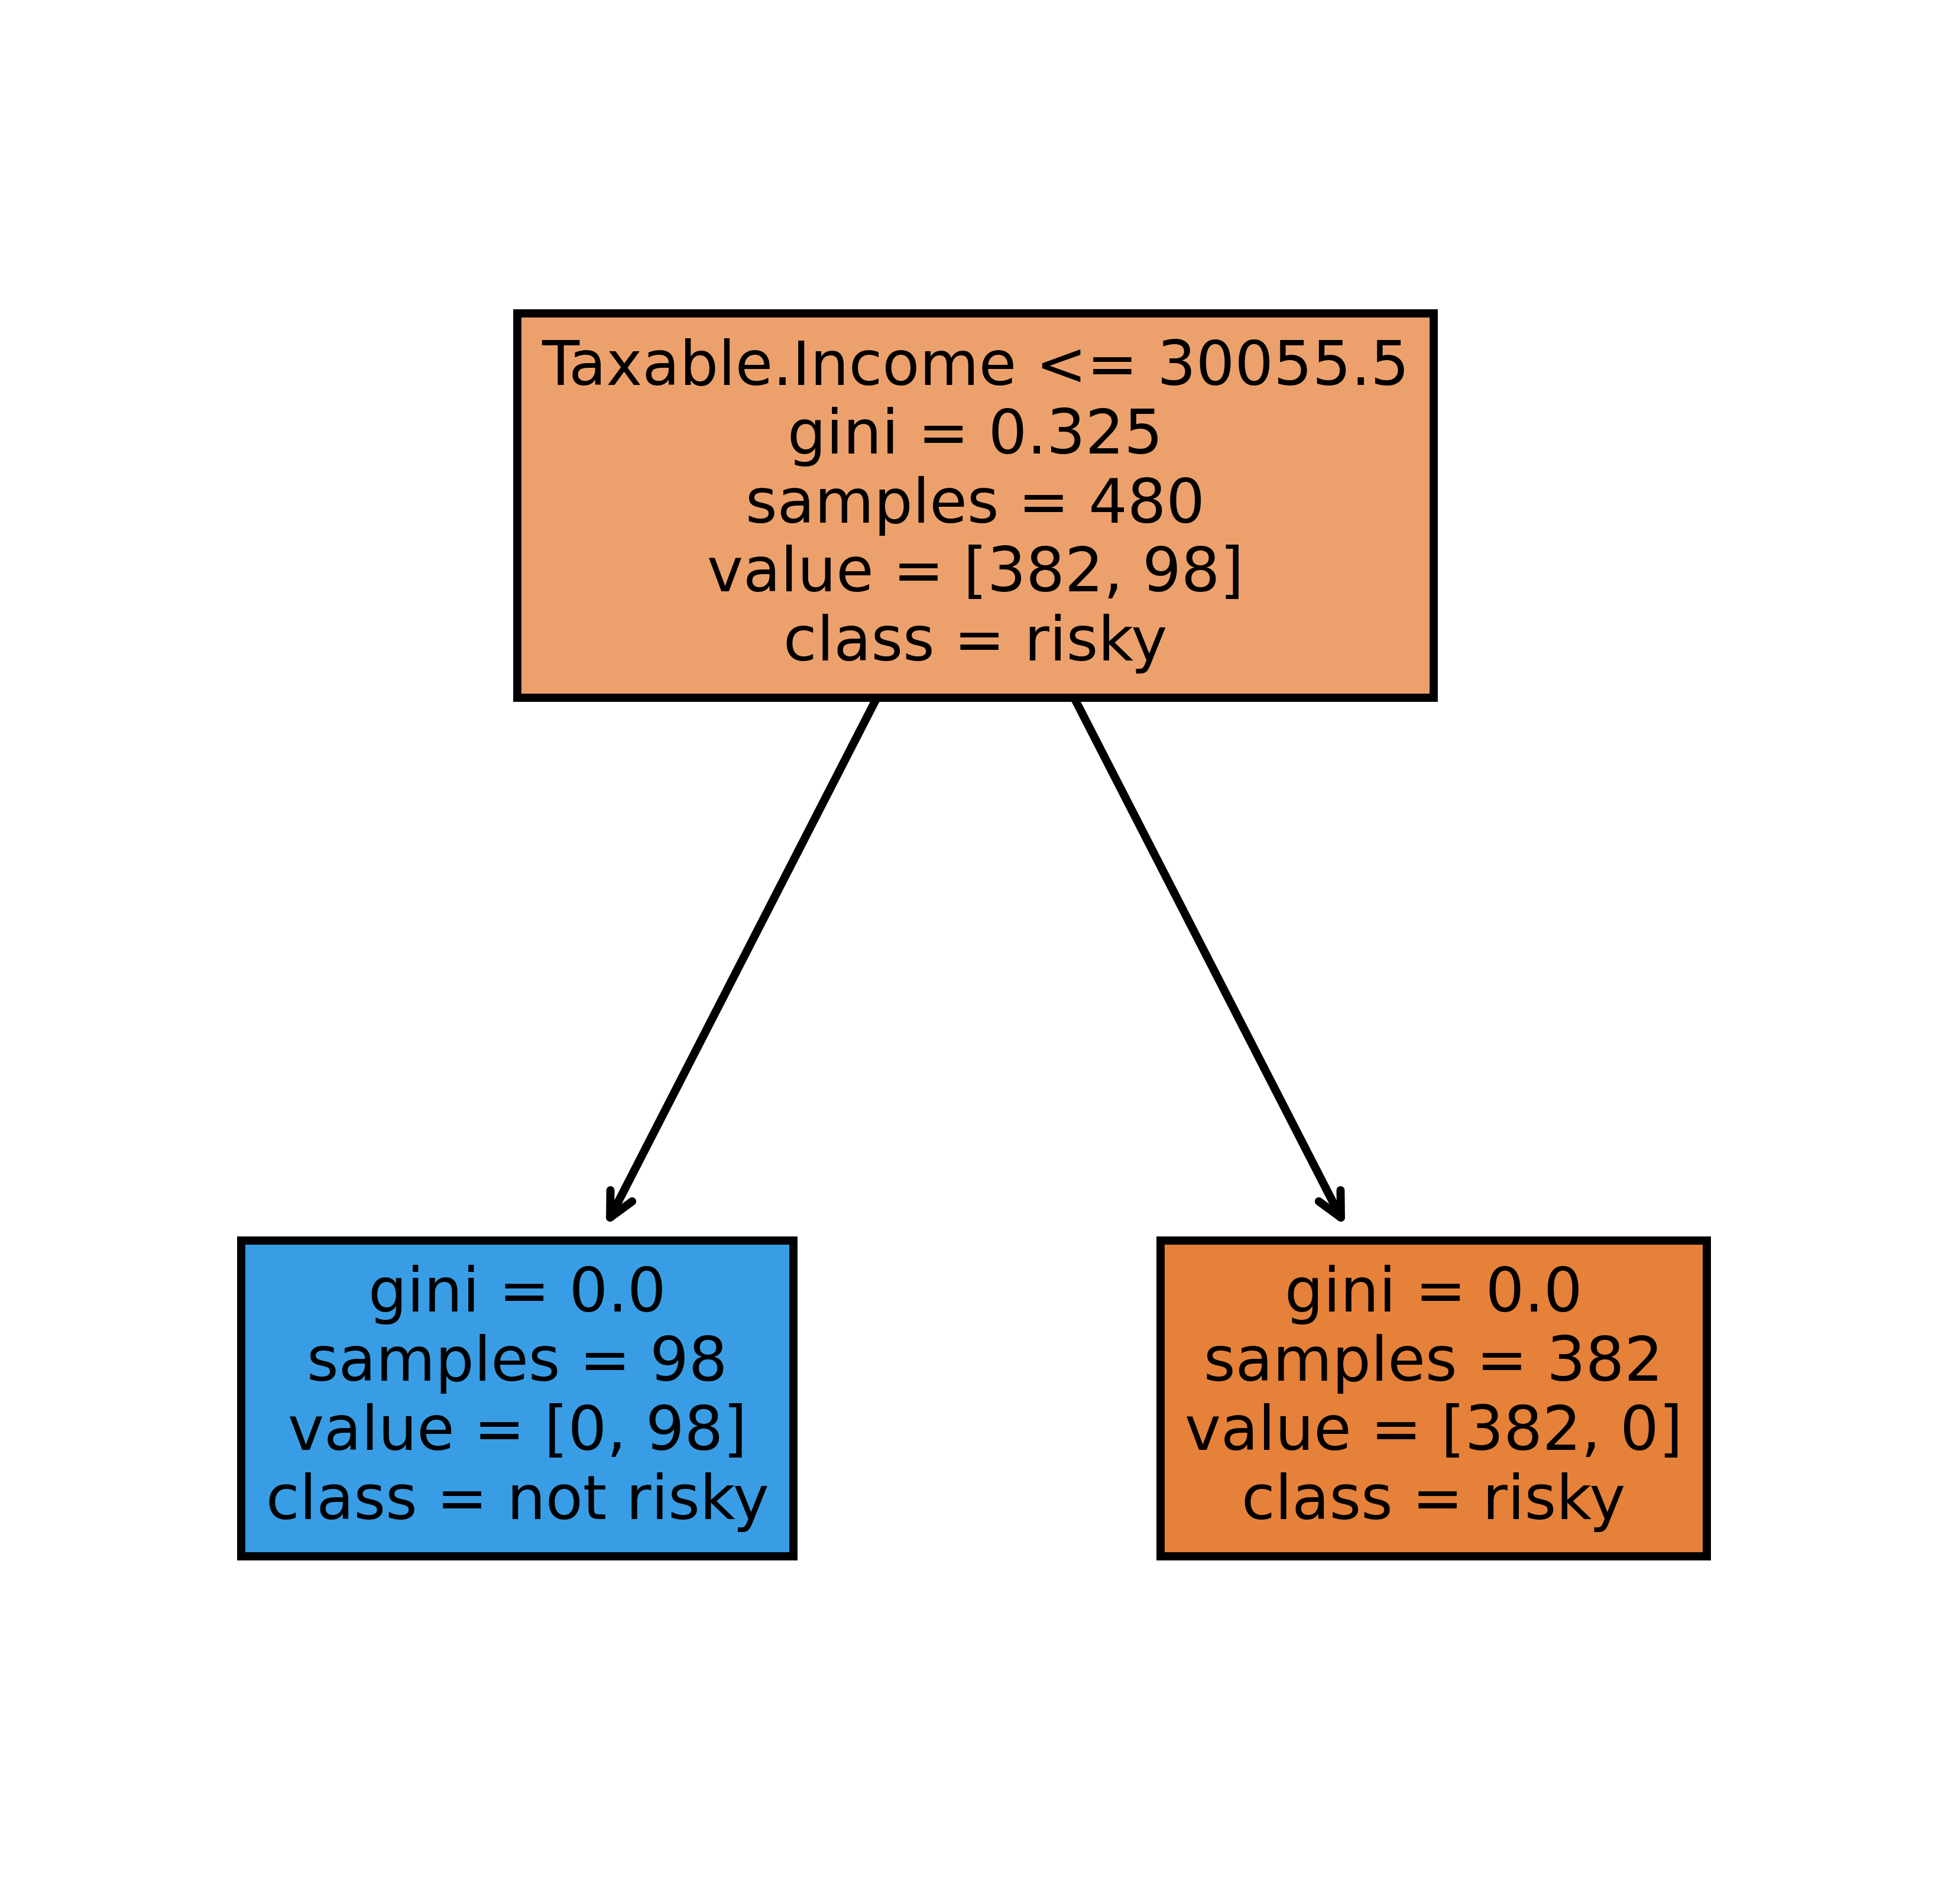

In [136]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['risky', 'not risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(mod1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [137]:
#Predicting on test data
preds = mod1.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    94
1    26
dtype: int64

In [138]:
metrics.accuracy_score(preds,y_test)

1.0

In [140]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [141]:
confusion_matrix(y_test,preds)

array([[94,  0],
       [ 0, 26]], dtype=int64)

### Building Decision Tree Classifier (CART) using entropyCriteria

In [142]:
mod2 = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=5)
mod2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

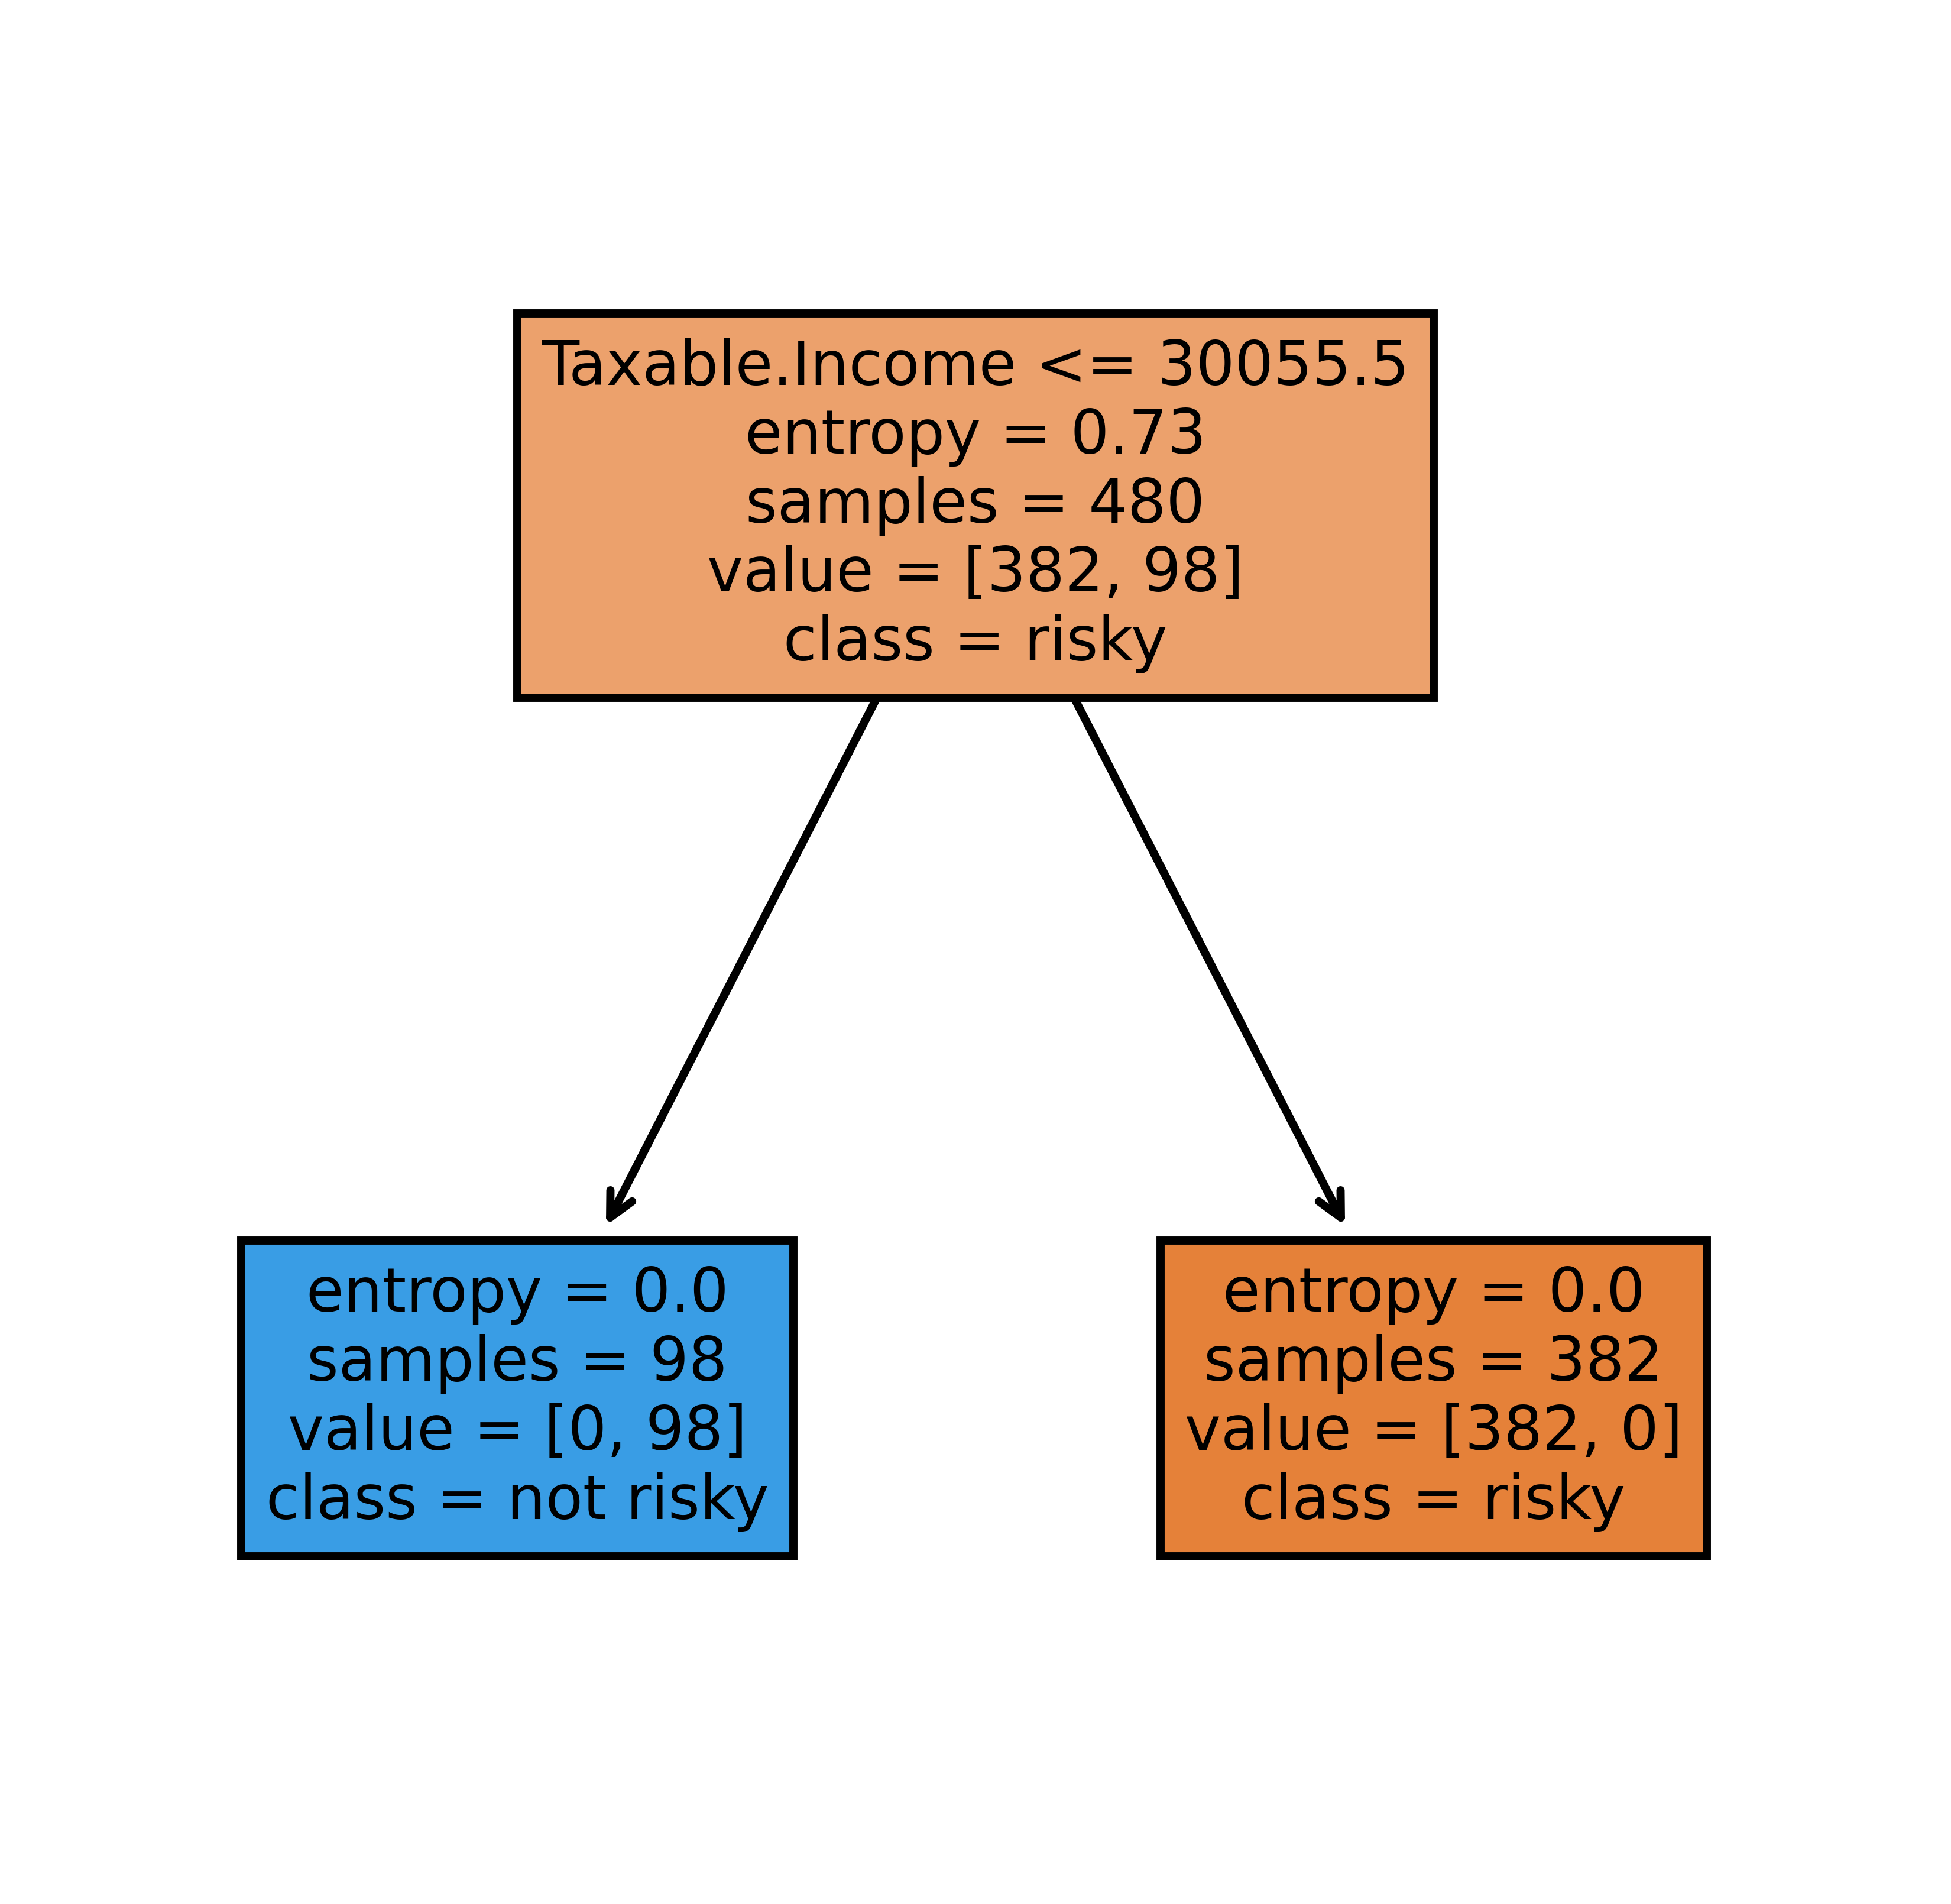

In [143]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['risky', 'not risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(mod2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [144]:
#Predicting on test data
preds = mod2.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    94
1    26
dtype: int64

In [145]:
metrics.accuracy_score(preds,y_test)

1.0

In [146]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [147]:
print(confusion_matrix(y_test,preds))

[[94  0]
 [ 0 26]]
